# **Face Recognition using Eigenfaces**
---




#### We will be using [FEI Face Database](https://fei.edu.br/~cet/facedatabase.html)  for our face recognition purpose. 
*Datasets consist of faces of 200 people and each person has two frontal images (one with a neutral expression and the other with a smiling facial expression), there are 400 full frontal face images manually registered and cropped.*
<br><br>**We will use normalized, equalized and cropped frontal face images.**


Add dataset in your Colab using:


```
!wget <link> 
```



Unzip your zip files using:
```
!unzip <name_of_your_zip_file>
```

In [1]:
# importing all the necessary packages 
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
%matplotlib inline

### Vectorization
We will use Python Imaging Library (PIL) to load images from files.
`PIL.Image.open()` Opens and identifies the given image file.`Note` Open into greyscale, or L(Luminance) mode: 

```
img = Image.open(f'{i}a.jpg').convert('L')  # i ranges from 1 to 200
img = img.resize((width, height),Image.ANTIALIAS) # for speed
```
Rearrange each Face image N x N into a column vector N<sup>2</sup> x 1. After Vectorization the shape of face matrix should be 200 x (width x height)





In [2]:
image_array=[]
for i in range(1,201):
    img = Image.open(f'/home/adhikari/100DT23/NaamiWinterSchool/Day2/Day2-feature_reprs/frontalimages_manuallyaligned_part1/{i}a.jpg').convert('L')  # i ranges from 1 to 200
    img = img.resize((50, 50),Image.ANTIALIAS)# for speed
    float_image=np.array(img)
    float_image=float_image.flatten()
    image_array.append(float_image)
    image_np_array=np.array(image_array)
    #imgplot = plt.imshow(img)
    #print(img.size)
    

In [3]:
# Check face_matrix.shape 
print(image_np_array.shape)

(200, 2500)


In [4]:
# Find mean_face
mean_face=np.mean(image_np_array,axis=0)
print(mean_face.shape)


(2500,)


Text(0.5, 1.0, 'Mean Face')

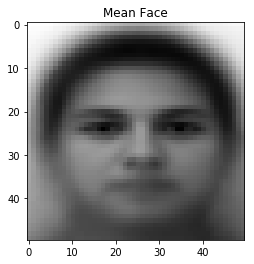

In [5]:
plt.imshow(mean_face.reshape(50,50),cmap='gray'); 
plt.title('Mean Face')



```
plt.imshow(mean_face.reshape(height,width),cmap='gray'); 
plt.title('Mean Face')
```

### Normalization


In [6]:
norm_matx=[]
for i in range(len(image_np_array)):
    diff=image_np_array[i]-mean_face
    norm_matx.append(diff)
    

In [7]:
#Perfrom Normalization
normmatrx_np_array=np.array(norm_matx)

In [8]:
print(normmatrx_np_array.shape)

(200, 2500)


In [9]:
matrx_transp=np.transpose(normmatrx_np_array)

In [10]:
# Calculate covariance matrix
#np.cov expects features as rows and observations as columns, so transpose
matrx_conv=np.cov(matrx_transp)

In [11]:
print(type(matrx_conv))

<class 'numpy.ndarray'>


In [12]:
#Find Eigen Vectors and Eigen Values, you can use SVD from np.linalg.svd
a0,a1,a2=np.linalg.svd(matrx_conv)

In [13]:
a0.shape

(2500, 2500)

In [14]:
a1.shape

(2500,)

In [15]:
a2.shape

(2500, 2500)

Text(0.5, 0.98, 'First 10 Eigenfaces')

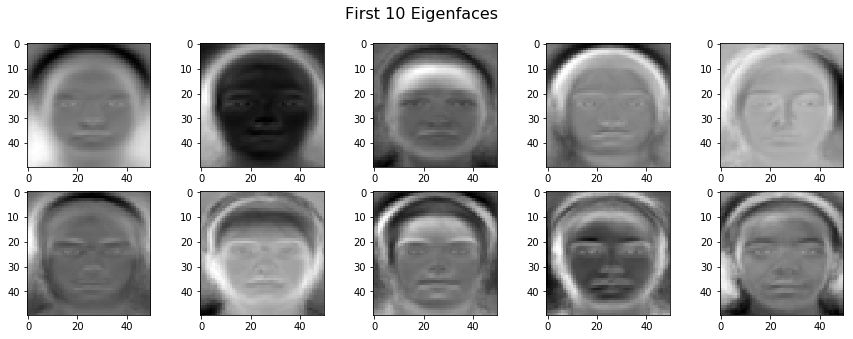

In [17]:

#Plot the first 10 Eigenfaces

fig, axs = plt.subplots(1,3,figsize=(15,5))
for i in np.arange(10):
    ax = plt.subplot(2,5,i+1)
    img = a0[:,i].reshape(50,50)
    plt.imshow(img, cmap='gray')
fig.suptitle("First 10 Eigenfaces", fontsize=16)



In [ ]:

#Reconstruction with increasing Eigenfaces
fig, axs = plt.subplots(2,5,figsize=(15,6))
for k, i in zip([0,1,9,19,39,79,159,199,399,799],np.arange(10)):
    # Reconstruct the first picture '1a.jpg' whose index is 0.
    img = Image.open(f'/home/adhikari/100DT23/NaamiWinterSchool/Day2/Day2-feature_reprs/frontalimages_manuallyaligned_part1/{i}a.jpg').convert('L')
    # Get PC scores of the images (wights)
    # Reconstruct first face in dataset using k PCs (projected_face)
    ax = plt.subplot(2,5,i+1)
    ax.set_title("k = "+str(k+1))
    plt.imshow(projected_face.reshape(height,width)+mean_face.reshape(height,width),cmap='gray');



In [ ]:
# Reconstruct with increasing Eigenfaces